In [25]:
import requests
import numpy as np
import pandas as pd
import datetime
import time
import stocks
import pandas_datareader as pdr
import matplotlib.pyplot as plt

%matplotlib inline

API_URL = "https://www.alphavantage.co/query"

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 10
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

index = ['30 dias', '1 ano', '3 anos', '5 anos', '10 anos']
setor_df = pd.DataFrame()

In [2]:
def get_info(ticker):
    stock = pdr.get_data_yahoo(ticker, start, end)
    return stock['Adj Close']

In [3]:
def get_info_alpha(ticker):
    data = {
        "function": "TIME_SERIES_DAILY_ADJUSTED",
        "symbol": ticker,
        "outputsize": "full",
        "datatype": "json",
        "apikey": "1VI1L6694V2Q3CFA",
    }
    response = requests.get(API_URL, params=data)
    ts = response.json()['Time Series (Daily)']
    df = pd.DataFrame(ts).T
    return df['5. adjusted close'].astype(float)

In [4]:
ret = pd.DataFrame()
def get_means(df, arr, period):
    for t in arr:
        ret['Retorno Mensal ' + t] = df[t].pct_change(period)
    try:
        ret.drop('Mean', axis=1, inplace=True)
    except:
        pass
    ret['Mean'] = round(ret.mean(axis=1)*100, 2)
    return ret['Mean'].iloc[0]

# Financeiros

In [5]:
arr = []
for t in stocks.financeiros:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.financeiros

mes = get_means(df, stocks.financeiros, -21)
ano = get_means(df, stocks.financeiros, -21*12)
anos_3 = get_means(df, stocks.financeiros, -21*12*3)
anos_5 = get_means(df, stocks.financeiros, -21*12*5)
anos_10 = get_means(df, stocks.financeiros, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Finaneiro'], )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 2.2 %
Últimos 12 meses: 24.3 %
Últimos 3 anos: 98.82 %
Últimos 5 anos: 160.36 %
Últimos 10 anos: nan %


# Bens Industriais

In [6]:
arr = []
for t in stocks.bens_industriais:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.bens_industriais


mes = get_means(df, stocks.bens_industriais, -21)
ano = get_means(df, stocks.bens_industriais, -21*12)
anos_3 = get_means(df, stocks.bens_industriais, -21*12*3)
anos_5 = get_means(df, stocks.bens_industriais, -21*12*5)
anos_10 = get_means(df, stocks.bens_industriais, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Bens Industriais'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 6.05 %
Últimos 12 meses: 47.64 %
Últimos 3 anos: 186.53 %
Últimos 5 anos: 107.77 %
Últimos 10 anos: nan %


# Consumo não básico

In [7]:
arr = []
for t in stocks.consumo_nao_basico:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.consumo_nao_basico


mes = get_means(df, stocks.consumo_nao_basico, -21)
ano = get_means(df, stocks.consumo_nao_basico, -21*12)
anos_3 = get_means(df, stocks.consumo_nao_basico, -21*12*3)
anos_5 = get_means(df, stocks.consumo_nao_basico, -21*12*5)
anos_10 = get_means(df, stocks.consumo_nao_basico, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Consumo Não Básico'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 1.35 %
Últimos 12 meses: 89.51 %
Últimos 3 anos: 69.36 %
Últimos 5 anos: 66.53 %
Últimos 10 anos: nan %


# Consumo não Cíclico

In [8]:
arr = []
for t in stocks.consumo_nao_ciclico:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.consumo_nao_ciclico

mes = get_means(df, stocks.consumo_nao_ciclico, -21)
ano = get_means(df, stocks.consumo_nao_ciclico, -21*12)
anos_3 = get_means(df, stocks.consumo_nao_ciclico, -21*12*3)
anos_5 = get_means(df, stocks.consumo_nao_ciclico, -21*12*5)
anos_10 = get_means(df, stocks.consumo_nao_ciclico, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Consumo Não Cíclico'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 4.17 %
Últimos 12 meses: 27.33 %
Últimos 3 anos: 79.39 %
Últimos 5 anos: 49.75 %
Últimos 10 anos: nan %


# Consumo Cíclico

In [9]:
arr = []
for t in stocks.consumo_ciclico:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.consumo_ciclico

mes = get_means(df, stocks.consumo_ciclico, -21)
ano = get_means(df, stocks.consumo_ciclico, -21*12)
anos_3 = get_means(df, stocks.consumo_ciclico, -21*12*3)
anos_5 = get_means(df, stocks.consumo_ciclico, -21*12*5)
anos_10 = get_means(df, stocks.consumo_ciclico, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Consumo Cíclico'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 9.02 %
Últimos 12 meses: 68.87 %
Últimos 3 anos: 762.69 %
Últimos 5 anos: 1310.25 %
Últimos 10 anos: nan %


# Diversos

In [10]:
arr = []
for t in stocks.diversos:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.diversos

mes = get_means(df, stocks.diversos, -21)
ano = get_means(df, stocks.diversos, -21*12)
anos_3 = get_means(df, stocks.diversos, -21*12*3)
anos_5 = get_means(df, stocks.diversos, -21*12*5)
anos_10 = get_means(df, stocks.diversos, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Diversos'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 7.84 %
Últimos 12 meses: 22.73 %
Últimos 3 anos: 84.03 %
Últimos 5 anos: 108.46 %
Últimos 10 anos: nan %


# Materiais Básicos

In [11]:
arr = []
for t in stocks.materiais_basicos:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.materiais_basicos

mes = get_means(df, stocks.materiais_basicos, -21)
ano = get_means(df, stocks.materiais_basicos, -21*12)
anos_3 = get_means(df, stocks.materiais_basicos, -21*12*3)
anos_5 = get_means(df, stocks.materiais_basicos, -21*12*5)
anos_10 = get_means(df, stocks.materiais_basicos, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Materiais Básicos'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 7.96 %
Últimos 12 meses: 6.47 %
Últimos 3 anos: 58.84 %
Últimos 5 anos: 93.19 %
Últimos 10 anos: nan %


# Petróleo

In [12]:
arr = []
for t in stocks.petroleo:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.petroleo

mes = get_means(df, stocks.petroleo, -21)
ano = get_means(df, stocks.petroleo, -21*12)
anos_3 = get_means(df, stocks.petroleo, -21*12*3)
anos_5 = get_means(df, stocks.petroleo, -21*12*5)
anos_10 = get_means(df, stocks.petroleo, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Petróleo'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 4.44 %
Últimos 12 meses: 31.34 %
Últimos 3 anos: 70.86 %
Últimos 5 anos: 107.76 %
Últimos 10 anos: nan %


# Saúde

In [13]:
arr = []
for t in stocks.saude:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.saude

mes = get_means(df, stocks.saude, -21)
ano = get_means(df, stocks.saude, -21*12)
anos_3 = get_means(df, stocks.saude, -21*12*3)
anos_5 = get_means(df, stocks.saude, -21*12*5)
anos_10 = get_means(df, stocks.saude, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Saúde'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: -0.09 %
Últimos 12 meses: 77.18 %
Últimos 3 anos: 100.11 %
Últimos 5 anos: 227.56 %
Últimos 10 anos: nan %


# Telecomunicação

In [14]:
arr = []
for t in stocks.telecomunicacao:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.telecomunicacao

mes = get_means(df, stocks.telecomunicacao, -21)
ano = get_means(df, stocks.telecomunicacao, -21*12)
anos_3 = get_means(df, stocks.telecomunicacao, -21*12*3)
anos_5 = get_means(df, stocks.telecomunicacao, -21*12*5)
anos_10 = get_means(df, stocks.telecomunicacao, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Telecomunicação'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 9.47 %
Últimos 12 meses: 29.5 %
Últimos 3 anos: 72.19 %
Últimos 5 anos: 48.66 %
Últimos 10 anos: nan %


# Utilidade Pública

In [15]:
arr = []
for t in stocks.utilidade_publica:
    arr.append(get_info(t))
    #time.sleep(12)

df = pd.concat(arr, axis=1, sort=True)
df = df[::-1]
df.columns = stocks.utilidade_publica

mes = get_means(df, stocks.utilidade_publica, -21)
ano = get_means(df, stocks.utilidade_publica, -21*12)
anos_3 = get_means(df, stocks.utilidade_publica, -21*12*3)
anos_5 = get_means(df, stocks.utilidade_publica, -21*12*5)
anos_10 = get_means(df, stocks.utilidade_publica, -21*12*10)

print('Último mês:', mes, '%')
print('Últimos 12 meses:', ano, '%')
print('Últimos 3 anos:', anos_3, '%')
print('Últimos 5 anos:', anos_5, '%')
print('Últimos 10 anos:', anos_10, '%')

periodos = [mes, ano, anos_3, anos_5, anos_10]
data = pd.DataFrame(periodos, index=index, columns=['Utilidade Pública'] )
setor_df = pd.concat([setor_df, data], axis=1, sort=False)

Último mês: 2.17 %
Últimos 12 meses: 47.68 %
Últimos 3 anos: 84.01 %
Últimos 5 anos: 268.64 %
Últimos 10 anos: nan %


In [28]:
setor_df = setor_df.T
setor_df

,30 dias,1 ano,3 anos,5 anos,10 anos
Finaneiro,2.20,24.30,98.82,160.36,NaN
Bens Industriais,6.05,47.64,186.53,107.77,NaN
Consumo Não Básico,1.35,89.51,69.36,66.53,NaN
Consumo Não Cíclico,4.17,27.33,79.39,49.75,NaN
Consumo Cíclico,9.02,68.87,762.69,1310.25,NaN
Diversos,7.84,22.73,84.03,108.46,NaN
Materiais Básicos,7.96,6.47,58.84,93.19,NaN
Petróleo,4.44,31.34,70.86,107.76,NaN
Saúde,-0.09,77.18,100.11,227.56,NaN
Telecomunicação,9.47,29.50,72.19,48.66,NaN


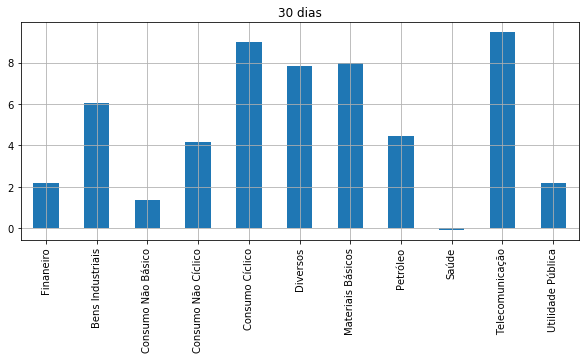

In [30]:
setor_df['30 dias'].plot(kind='bar', figsize=(10,4))
plt.title('30 dias')
plt.grid()

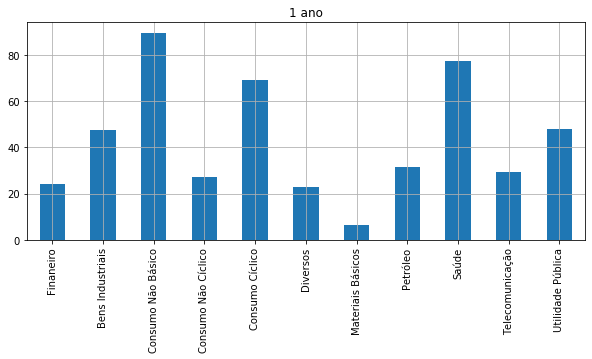

In [29]:
setor_df['1 ano'].plot(kind='bar', figsize=(10,4))
plt.title('1 ano')
plt.grid()

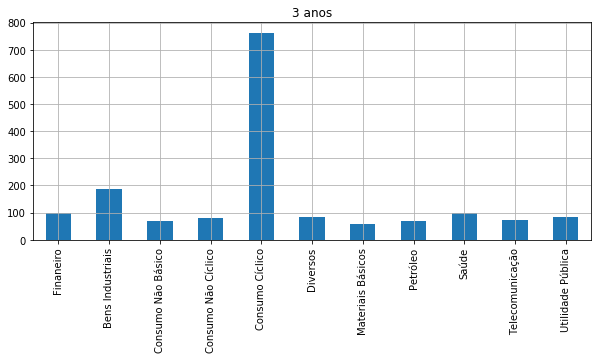

In [31]:
setor_df['3 anos'].plot(kind='bar', figsize=(10,4))
plt.title('3 anos')
plt.grid()

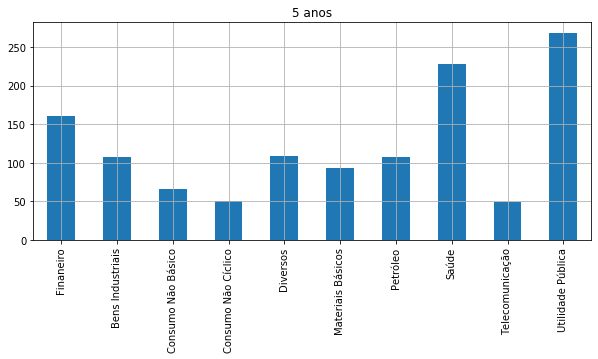

In [36]:
setor_df.drop('Consumo Cíclico')['5 anos'].plot(kind='bar', figsize=(10,4))
plt.title('5 anos')
plt.grid()